# **Caso Práctico: Campañas de Marketing con Ads Publicitarios en Redes Sociales**
El documento corresponde a un caso práctico que puede ser utilizado como guía para obtener información relevante al aplicar estadística descriptiva y visualización de datos.

### **Contexto empresarial**

Las campañas de marketing publicitarias en redes sociales son una fuente importante de conversión de ventas. Los datos utilizados en este caso de uso provienen de una campaña de marketing en redes sociales de una organización anónima. El objetivo es entender el impacto de Ads publicitarios en redes sociale sobre en la coversión de ventas de un determinado producto ofertado. La empresa utilizo Google Adwords para monitorear la campaña y las conversiones.

### **Descripción de los datos**

Los datos corresponden a 11 variables:

- **ad_id**: un ID único para cada anuncio.
- **xyz_campaign_id**: un ID asociado a cada campaña publicitaria de la empresa XYZ.
- **fb_campaign_id**: un ID asociado a cómo Facebook rastrea cada campaña.
- **age**: edad de la persona a la que se le muestra el anuncio.
- **gender**: género de la persona a la que se le muestra el anuncio.
- **interest**: un código que especifica la categoría a la que pertenece el interés de la persona (los intereses son los mencionados en el perfil público de Facebook de la persona).
- **Impressions**: el número de veces que se mostró el anuncio.
- **Clicks**: número de clics en ese anuncio.
- **Spent**: cantidad pagada por la empresa XYZ a Facebook para mostrar ese anuncio.
- **Total_Conversion**: número total de personas que preguntaron sobre el producto después de ver el anuncio.
- **Approved_Conversion**: número total de personas que compraron el producto después de ver el anuncio.

## **1. Configuración Inicial y Carga de Datos**
Primero, configuraremos nuestro entorno de análisis e importaremos las bibliotecas necesarias.

In [ ]:
# Importación de bibliotecas
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carga de datos
path = kagglehub.dataset_download("loveall/clicks-conversion-tracking")
df = pd.read_csv(path + "/" + os.listdir(path)[0])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## **2. Análisis inicial**
Analizaremos la información inherente a las campañas para entender:
- Tipos de datos
- Número único de ads
- Número único de campañas

In [ ]:
# Tipos de Datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
# Número unico de ads y campañas
print("Número unico de Ads publicitarios enviados:", df['ad_id'].nunique())
print("Número unico de campañas publicitarias:", df['xyz_campaign_id'].nunique())
print("Número unico de campañas en Facebook:", df['fb_campaign_id'].nunique())

Número unico de Ads publicitarios enviados: 1143
Número unico de campañas publicitarias: 3
Número unico de campañas en Facebook: 691


#### **Insights relevantes**
- Se enviaron 1143 Ads únicos.
- La empresa XYZ realizó 3 campañas publicitarias.
- La empresa XYZ registro 691 campañas publicitarias en Facebook.
- No existen valores nulos o faltantes en los datos.

## **3. Análisis Estadístico Descriptivo**
### **3.1. Variables Numéricas**
Analizaremos la estructura de los datos, asi como tambien las medidas de tendencia y dispersión de las variables para entender:
- Distribuciones
- Valores nulos
- Valores atípicos

In [ ]:
# Análisis descriptivo variables numéricas
def analyze_numeric_variables(df, type_list):
    """Análisis detallado de variables numéricas"""
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Estadísticos descriptivos
    df = df.select_dtypes(include=type_list)
    total_rows = df.shape[0]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    atipicos = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    summary = pd.DataFrame(columns=df.columns)
    summary.loc['conteo_registros'] = total_rows
    summary.loc['conteo_nulos'] = df.isnull().sum()
    summary.loc['porcentaje_nulos'] = df.isnull().sum() / total_rows * 100
    summary.loc['promedio'] = df.mean()
    summary.loc['desv_std'] = df.std()
    summary.loc['min'] = df.min()
    summary.loc['25%'] = Q1
    summary.loc['50%'] = df.median()
    summary.loc['75%'] = Q3
    summary.loc['max'] = df.max()
    summary.loc['IQR'] = IQR
    summary.loc['atipicos'] = atipicos
    summary.loc['porcentaje_atipicos'] = atipicos / total_rows * 100

    return summary

# Realizamos el análisis sin incluir los ids unicos de Ads y campañas
analyze_numeric_variables(df.drop(["ad_id", "xyz_campaign_id", "fb_campaign_id"], axis=1), type_list=["int64", "float64"])

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
conteo_registros,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
conteo_nulos,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
porcentaje_nulos,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
promedio,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
desv_std,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


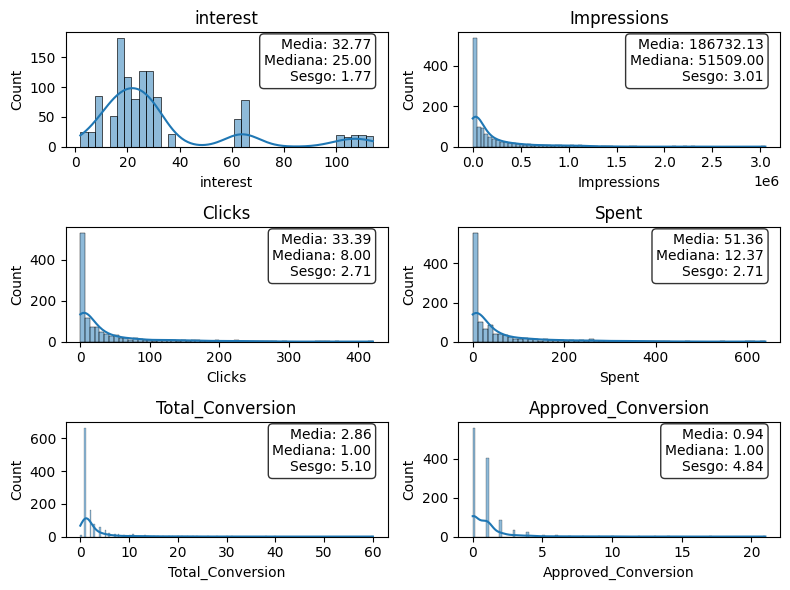

In [ ]:
# Lista variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
numeric_cols = [column for column in numeric_cols if column not in ["ad_id", "xyz_campaign_id", "fb_campaign_id"]]

# Visualización variables numéricas
def visualize_numeric_variables(df, numeric_cols):
    """Visualización de distribuciones"""
    fig, axes = plt.subplots(len(numeric_cols)//2 + len(numeric_cols)%2, 2,
                             figsize=(8, 2*len(numeric_cols)//2))
    axes = axes.ravel()

    for idx, col in enumerate(numeric_cols):
        # Histograma con KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f'{col}')

        # Añadir estadísticas relevantes
        stats_text = f'Media: {df[col].mean():.2f}\n'
        stats_text += f'Mediana: {df[col].median():.2f}\n'
        stats_text += f'Sesgo: {df[col].skew():.2f}'
        axes[idx].text(0.95, 0.95, stats_text,
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

visualize_numeric_variables(df, numeric_cols=numeric_cols)

#### **Insights relevantes**
- Dada la definición de cada variable que insights relevantes puedes describir?

### **3.2. Variables Categóricas**
Analizaremos la estructura de los datos, asi como tambien las proporciones de las categorias para entender:
- Distribuciones
- Valores nulos

In [ ]:
# Análisis descriptivo variables categóricas
def analyze_categoric_variables(df, type_list):
    """Análisis detallado de variables categóricas"""
    df = df.select_dtypes(include=type_list)

    # Estadísticos descriptivos
    total_rows = df.shape[0]
    summary = pd.DataFrame(columns=df.columns)
    summary.loc['conteo_nulos'] = df.isnull().sum()
    summary.loc['porcentaje_nulos'] = df.isnull().sum() / total_rows * 100
    summary.loc['numero_categorias'] = df.nunique()
    summary.loc['max_categoria'] = df.mode().iloc[0]

    def max_cat_percentage(col):
        return col.value_counts(normalize=True).max() * 100

    summary.loc['porcentaje_max_cat'] = df.apply(max_cat_percentage)

    def min_category(col):
        return col.value_counts().idxmin()

    summary.loc['min_categoria'] = df.apply(min_category)

    def min_cat_percentage(col):
        return col.value_counts(normalize=True).min() * 100

    summary.loc['porcentaje_min_cat'] = df.apply(min_cat_percentage)

    return summary

analyze_categoric_variables(df, type_list=['object'])

,age,gender
conteo_nulos,0.0,0.0
porcentaje_nulos,0.0,0.0
numero_categorias,4.0,2.0
max_categoria,30-34,M
porcentaje_max_cat,37.270341,51.793526
min_categoria,40-44,F
porcentaje_min_cat,18.372703,48.206474


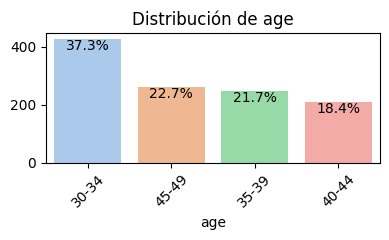

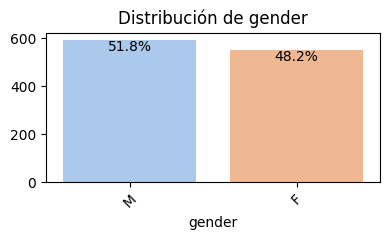

In [ ]:
# Lista variables categóricas
categoric_cols = df.select_dtypes(include=['object'])

# Visualización variables categóricas
def visualize_categoric_variables(df, categoric_cols):
    """Visualización de distribuciones"""
    for col in categoric_cols:
        plt.figure(figsize=(4, 2.5))

        # Gráfico de barras con porcentajes
        value_counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100

        sns.barplot(x=value_counts.index, y=value_counts.values, palette='pastel')
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45)

        # Añadir etiquetas de porcentaje
        for i, v in enumerate(value_counts.values):
            plt.text(i, v, f'{percentages[i]:.1f}%',
                    ha='center', va='top')

        plt.tight_layout()
        plt.show()

visualize_categoric_variables(df, categoric_cols=categoric_cols)

#### **Insights relevantes**
- Dada la definición de cada variable que insights relevantes puedes describir?

## **4. Análisis de Conversión**

El proposito de este análisis es conocer como los clientes interactuaron con los Ads publicitarios y como estas interacciones se traducieron en ventas exitosas. Para esto calcularemos los siguientes indicadores.

- **Click-Through Rate (CTR)**: porcentaje de impresiones "impressions" que resultaron en clicks de clientes en el Ad publicitario. Un alto CTR indica que el Ad fue exitoso en lograr que los cliente den clic.
- **Total Conversion Rate (TCR)**: porcentaje de clicks de clientes que resultaron en algun tipo de conversión. Muestra la efectividad general de convertir clics en cualquier forma de conversión.
- **Approved Conversion Rate**: porcentaje de clicks de clientes que resultaron en conversiones aprobadas. Se enfoca específicamente en las conversiones que fueron aprobadas (personas que compraron el producto después de ver el anuncio), lo cual puede ser crítico dependiendo de los objetivos de la campaña.
- **Cost Per Click (CPC)**: el costo que asume la empresa por cada click de clientes. Valores bajos son generalmente mejores, ya que indican eficiencia en el costo de alcanzar clicks de clientes y conversiones.
- **Cost Per Conversion**: el costo que asume la empresa por cada click que resulto en alguna conversión. Valores bajos son generalmente mejores, ya que indican eficiencia en el costo de alcanzar clicks de clientes y conversiones.

Donde:

$
    \small
    \textbf{Click-Through Rate} = \frac{\text{Clicks}}{\text{Impressions}} \times 100\% \\
    \small
    \textbf{Total Conversion Rate} = \frac{\text{Total_Conversion}}{\text{Clicks}} \times 100\% \\
    \small
    \textbf{Approved Conversion Rate} = \frac{\text{Approved_Conversion}}{\text{Clicks}} \times 100\% \\
    \small
    \textbf{Cost Per Click} = \frac{\text{Spent}}{\text{Clicks}} \\
    \small   
    \textbf{Cost Per Conversion} = \frac{\text{Spent}}{\text{Total_Conversion}}
$

In [ ]:
# Calculo de indicadores de conversión
def convertion_calculation(df):
    df['Click_Through_Rate'] = (df['Clicks'] / df['Impressions']) * 100
    df['Total_Conversion_Rate'] = (df['Total_Conversion'] / df['Clicks']) * 100
    df['Approved_Conversion_Rate'] = (df['Approved_Conversion'] / df['Clicks']) * 100
    df['Cost_Per_Click'] = df['Spent'] / df['Clicks']
    df['Cost_Per_Conversion'] = df['Spent'] / df['Total_Conversion']

    return df

df = convertion_calculation(df)

# Reemplazamos valores 1/0 = inf pro valores faltantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)

conversion_columns = [
    'Click_Through_Rate', 'Total_Conversion_Rate', 'Approved_Conversion_Rate',
    'Cost_Per_Click', 'Cost_Per_Conversion'
]

df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,200.0,100.0,1.43,0.715
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,100.0,0.0,0.91,0.910
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN,NaN,0.000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,100.0,0.0,1.25,1.250
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,100.0,100.0,1.29,1.290


### **4.1. Estadísticos Descriptivos Indicadores de Conversión**
Analizaremos las medidas de tendencia y dispersión de las variables para entender:
- Distribuciones
- Valores nulos
- Valores atípicos

In [ ]:
# Análisis descriptivo de los indicadores
analyze_numeric_variables(df[conversion_columns], type_list=["int64", "float64"])

,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
conteo_registros,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
conteo_nulos,0.000000,207.000000,207.000000,207.000000,8.000000
porcentaje_nulos,0.000000,18.110236,18.110236,18.110236,0.699913
promedio,0.016420,29.515203,10.903023,1.499347,16.129614
desv_std,0.011506,38.724016,24.703240,0.232879,24.345658
min,0.000000,0.000000,0.000000,0.180000,0.000000
25%,0.010022,5.870098,0.000000,1.390000,1.390000
50%,0.015981,12.876830,1.253931,1.498273,8.336667
75%,0.023364,33.333333,6.666667,1.644364,21.559808
max,0.105932,400.000000,200.000000,2.212000,332.989999


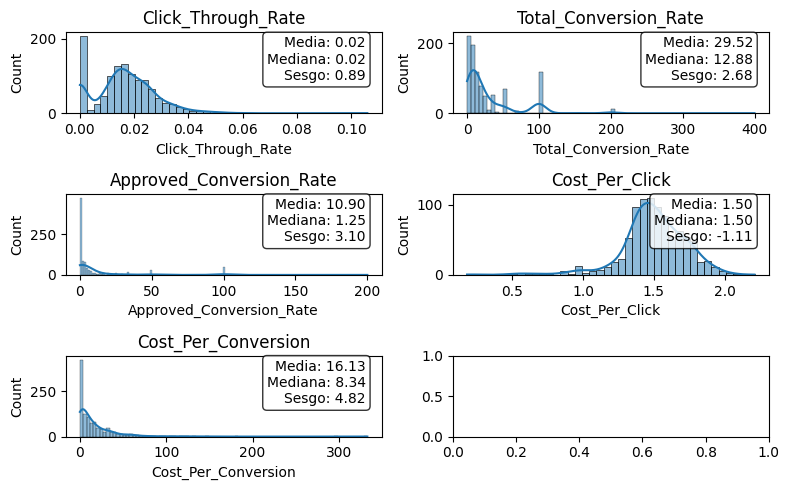

In [ ]:
# Visualización de los indicadores
visualize_numeric_variables(df, numeric_cols=conversion_columns)

#### **Insights relevantes**

- **Click-Through Rate (CTR)**
 - Tengamos en cuenta que lo deseable es un mayor CTR, dado que la tasa de impresiones que resultaron en clics es alta.
 - El CTR promedio es de 0.016%. Esto significa que, en promedio, se genera 1 clic por cada 6250 impresiones.
 - Más de 200 anuncios tienen un CTR del 0%, lo que indica que no se ha hecho ningún clic en absoluto.

- **Total Conversion Rate (TCR)**
 - Tiene un sesgo grande hacia la izquierda. Indicando que en la mayoria de casos un click no resulto en una conversión.
 - Hay algunos anuncios que tienen un TCR superior a 100, lo que significa que el número total de personas que consultaron sobre el producto después de ver el anuncio es mayor que el número de personas que hicieron clic en ese anuncio. Esto puede deberse a que una sola persona que hizo clic puede hacer consultas.
 - El TCR máximo está alrededor de 400. Esto indica que al menos en un anuncio, 4 veces más personas consultaron el anuncio en comparación con las que hicieron clic en él.

- **Approved Conversion Rate**
 - Tiene un sesgo grande hacia la izquierda. Indicando que en la mayoria de veces el cliente no puso atención al Ad.

- **Cost Per Click (CPC)**
 - En promedio el costo por cada click de un cliente es 1.5.
 - En general, dada la distribución y desviación estandar, el costo por click no varia mayormente respecto a la media.
 - El costo maximo por click es de 2.5.

- **Cost Per Conversion**
 - Tiene un sesgo grande hacia la izquierda.
 - Al menos un Ad costo mas de 300 para alcanzar una conversión.


### **4.2. Análisis Segmentado**
Analizaremos como se comportan los indicadores de conversión por segmentos:
- Edad
- Género

### **4.2.1. Edad**

In [ ]:
cols_to_analyse = ['Spent', 'Click_Through_Rate', 'Total_Conversion_Rate', 'Approved_Conversion_Rate', 'Cost_Per_Click', 'Cost_Per_Conversion']

In [ ]:
# Por edad
age_analysis = df.groupby('age').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum',
    'Spent': 'sum'
}).reset_index()

age_analysis = convertion_calculation(age_analysis)

age_analysis.head()

,age,Impressions,Clicks,Total_Conversion,Approved_Conversion,Spent,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
0,30-34,67993019,9483,1431,494,15252.399986,0.013947,15.090161,5.209322,1.608394,10.658560
1,35-39,42104644,7094,626,207,11112.429994,0.016848,8.824359,2.917959,1.566455,17.751486
2,40-44,39604307,7736,523,170,11589.729981,0.019533,6.760600,2.197518,1.498155,22.160096
3,45-49,63732858,13852,684,208,20750.669997,0.021734,4.937915,1.501588,1.498027,30.337237


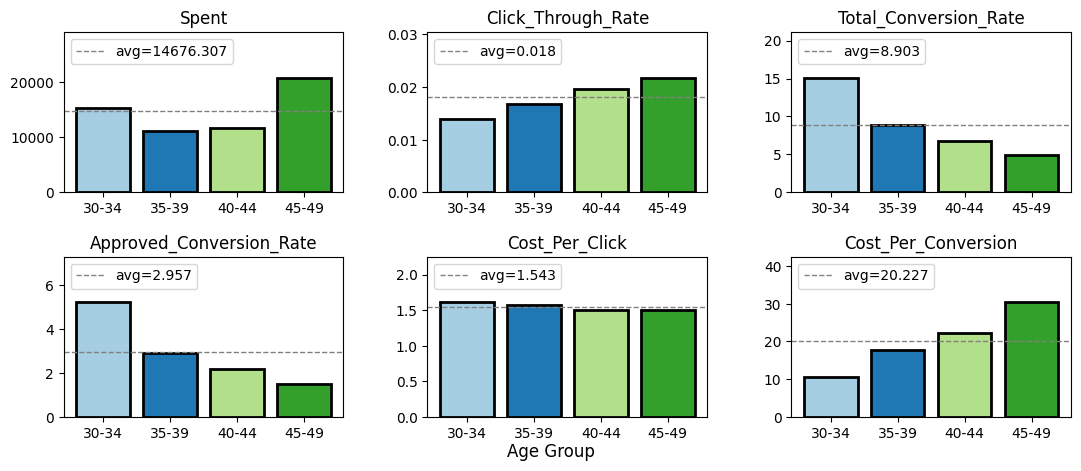

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(13, 5))
axes = axes.flatten()
colors = plt.cm.Paired(range(len(age_analysis)))

for i, col in enumerate(cols_to_analyse):

    bars = axes[i].bar(age_analysis['age'], age_analysis[col],
                color=colors, edgecolor='black', linewidth=2.0)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(None)
    axes[i].set_ylim(0, age_analysis[col].max() * 1.4)

    mu = age_analysis[col].mean()
    axes[i].axhline(mu, color='grey', linestyle='dashed',
                    linewidth=1, label=f'avg={mu:0.3f}')
    axes[i].legend(loc='upper left')

fig.text(0.5, 0.04, 'Age Group', ha='center', va='center', fontsize=12)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

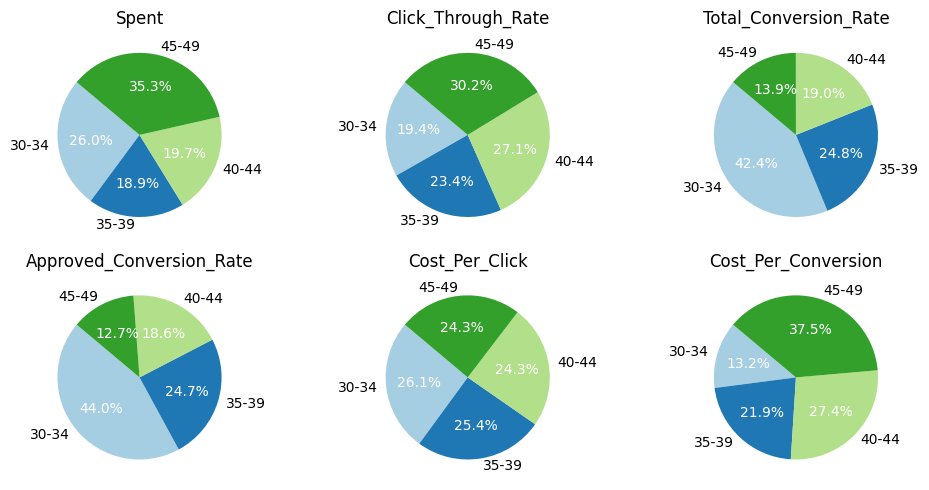

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyse):
    wedges, texts, autotexts = axes[i].pie(age_analysis[col],
                                           labels=age_analysis['age'],
                                           colors=colors,
                                           autopct='%1.1f%%',
                                           startangle=140)
    axes[i].set_title(f'{col}')

    for text in autotexts:
        text.set_color('white')

plt.tight_layout()
plt.show()

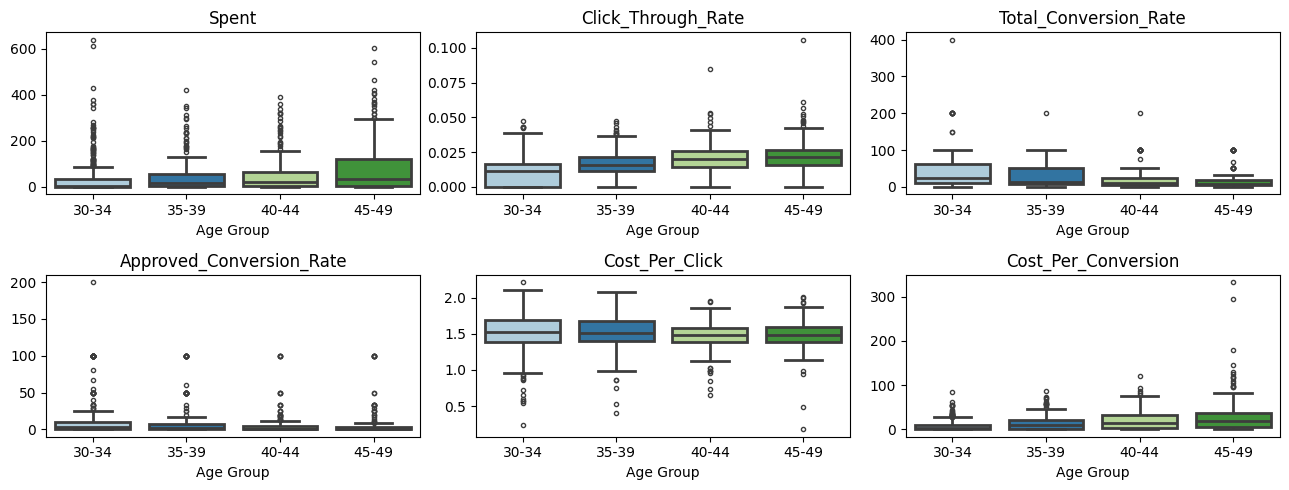

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(13, 5))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyse):

    sns.boxplot(x='age', y=col, data=df, ax=axes[i],
                linewidth=2.0, fliersize=3.0, palette="Paired")

    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel(None)

plt.tight_layout()
plt.show()

### **4.2.2. Género**

In [ ]:
# Por género
gender_analysis = df.groupby('gender').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum',
    'Spent': 'sum'
}).reset_index()

gender_analysis = convertion_calculation(gender_analysis)

gender_analysis.head()

,gender,Impressions,Clicks,Total_Conversion,Approved_Conversion,Spent,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
0,F,114862847,23878,1644,495,34502.619963,0.020788,6.884999,2.073038,1.444954,20.986995
1,M,98571981,14287,1620,584,24202.609995,0.014494,11.338979,4.087632,1.694030,14.939883


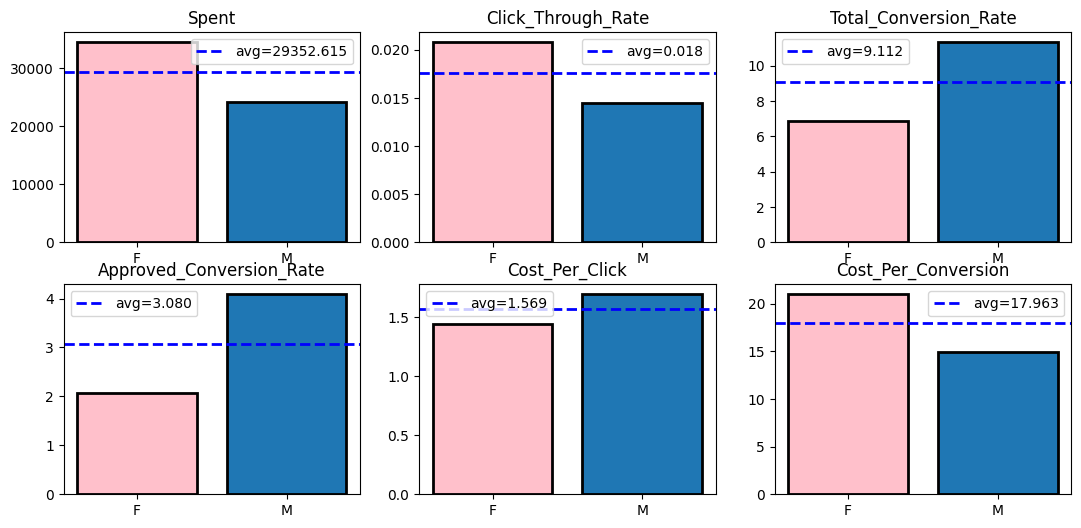

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(13, 6))
axes = axes.flatten()
colors = ['pink', 'C0']

for i, col in enumerate(cols_to_analyse):

    axes[i].bar(gender_analysis['gender'], gender_analysis[col],
                color=colors, edgecolor='black', linewidth=2.0)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(None)

    mu = gender_analysis[col].mean()
    axes[i].axhline(mu, color='blue', linestyle='dashed',
                    linewidth=2, label=f'avg={mu:0.3f}')
    axes[i].legend()

plt.show()

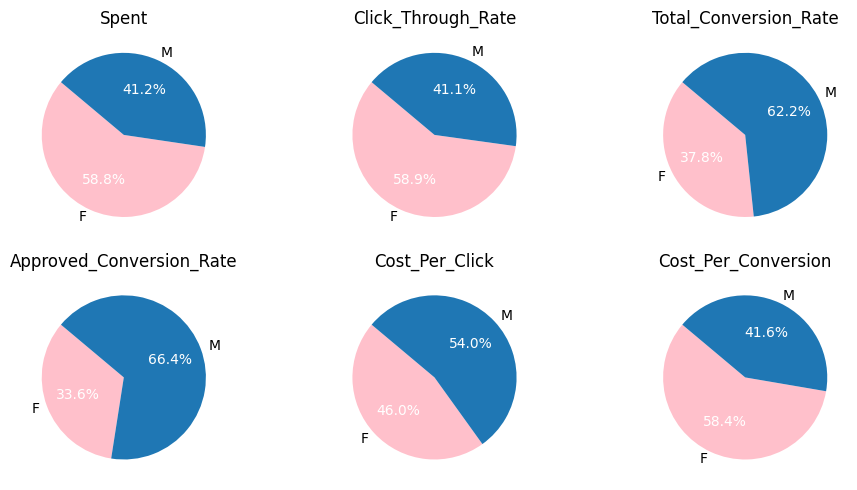

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyse):
    wedges, texts, autotexts = axes[i].pie(gender_analysis[col],
                                           labels=gender_analysis['gender'],
                                           colors=colors,
                                           autopct='%1.1f%%',
                                           startangle=140)
    axes[i].set_title(f'{col}')

    for text in autotexts:
        text.set_color('white')

plt.tight_layout()
plt.show()

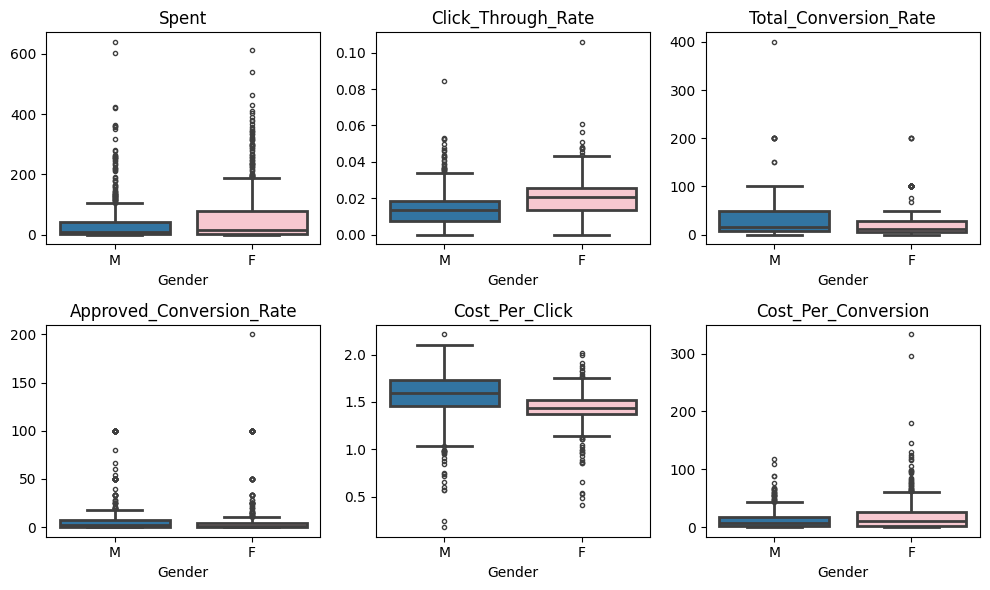

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyse):

    sns.boxplot(x='gender', y=col, data=df, ax=axes[i],
                linewidth=2.0, fliersize=3.0, palette=['C0', 'pink'])

    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(None)

plt.tight_layout()
plt.show()

### **4.3. Análisis Performance de Campaña**
Analizaremos el performance (efectividad) de cada campaña con base en los ratios de conversión y la eficiencia de costos. De igual manera identificaremos los Ads con mayores ratios de conversión y bajos costos.

### **4.3.1. Performance por Campaña**

In [ ]:
# Performance por campaña
df_filtro = df[df['Clicks'] > 0]

campaign_performance = df_filtro.groupby('xyz_campaign_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

campaign_performance = convertion_calculation(campaign_performance)

# Ordenar por Total Conversion Rate (TCR)
campaign_performance = campaign_performance.sort_values(by='Total_Conversion_Rate', ascending=False)
campaign_performance.head()

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
0,916,448046,113,149.710001,39,16,0.025221,34.513274,14.159292,1.324867,3.838718
1,936,7797942,1984,2893.369999,356,118,0.025443,17.943548,5.947581,1.458352,8.127444
2,1178,204699959,36068,55662.149959,2657,869,0.017620,7.366641,2.409338,1.543256,20.949247


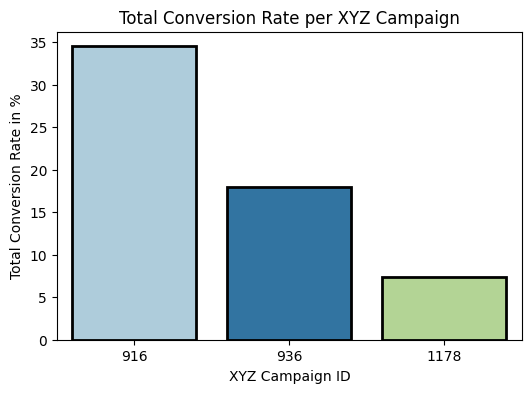

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(data=campaign_performance,
            x='xyz_campaign_id', y='Total_Conversion_Rate',
            edgecolor='black', linewidth=2.0,
            palette='Paired')
plt.title('Total Conversion Rate por XYZ Campaign')
plt.xlabel('XYZ Campaign ID')
plt.ylabel('Total Conversion Rate en %')

plt.show()

### **4.3.2. Performance por Ads**

In [ ]:
# Performance por Ad
df_filtro = df[df['Clicks'] > 0]

ad_performance = df_filtro.groupby('ad_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

ad_performance = convertion_calculation(ad_performance)

In [ ]:
# Top 10 Ads
top_conversion_ads  = ad_performance.sort_values(by='Total_Conversion_Rate', ascending=False)
avg_total_tcr = df_filtro['Total_Conversion_Rate'].mean()
top_conversion_ads['% Mayor que la media'] = round(100 * (top_conversion_ads['Total_Conversion_Rate'] / avg_total_tcr), 2)
top_conversion_ads[['ad_id', 'Total_Conversion_Rate', '% Mayor que la media']].head(10)

,ad_id,Total_Conversion_Rate,% Mayor que la media
37,734290,400.0,1355.23
0,708746,200.0,677.62
352,1121129,200.0,677.62
236,780511,200.0,677.62
289,950326,200.0,677.62
219,779622,200.0,677.62
32,711623,200.0,677.62
305,951391,200.0,677.62
330,1121101,200.0,677.62
334,1121107,200.0,677.62


#### **Insights relevantes**

- El Ad con mayor TCR tiene un TCR 13 veces mayor al TCR promedio.
- Los siguientes top 10 Ads con mayor TCR, tienen un TCR 6 veces mayor que el TCR promedio.

In [ ]:
# Ordenar por Total Conversion Rate (TCR)
lowest_cost_ads  = ad_performance.sort_values(by='Cost_Per_Conversion', ascending=True)
average_cost_per_conversion = df_filtro['Cost_Per_Conversion'].mean()
lowest_cost_ads['% Menor que la Media'] = 100 * (average_cost_per_conversion - lowest_cost_ads['Cost_Per_Conversion']) / average_cost_per_conversion
lowest_cost_ads[['ad_id', 'Cost_Per_Conversion', '% Menor que la Media']].head(10)

,ad_id,Cost_Per_Conversion,% Menor que la Media
174,777105,0.180,99.084618
69,736869,0.240,98.779491
37,734290,0.260,98.677782
94,747223,0.300,98.474363
315,951756,0.410,97.914963
219,779622,0.445,97.736972
189,777758,0.480,97.558981
134,776416,0.490,97.508127
258,781354,0.530,97.304709
78,737931,0.540,97.253854


#### **Insights relevantes**

- El Ad con menor costo no varia en mayor medida respecto al promedio de costo por conversión.

### **4.4. A/B Testing**
El objetivo de A/B testing es comparar los resultados de aplicar dos versiones de un mismo elemento (diseño de Ads, mensajes, etc.) a audiencias o segmentos de clientes similares. Para los datos en este análisis solo podemos simular como realizar un análisis A/B testing dado que no cumplimos con la condición explicada. Entonces, una verdadera prueba A/B involucraría:

- Misma audiencia: dividiendo la misma audiencia al azar en dos o más grupos.
- Variaciones controladas: mostrando a cada grupo una versión diferente del anuncio (por ejemplo, diferente creatividad, mensaje) mientras se mantienen constantes todas las demás variables.
- Comparación directa: Midiendo qué versión tiene un mejor rendimiento en términos de conversiones, clics u otra métrica específica.

#### ** Normalmente seguiríamos los siguientes pasos**

- Definir hipótesis: ¿Qué estás probando?
- Aleatoriedad: asegúrate de que los usuarios se asignen al azar a los grupos.
- Realizar el experimento: recoger datos.
- Calcular métricas: como tasas de conversión.
- Pruebas de hipótesis: utiliza una prueba adecuada (por ejemplo, prueba z) para determinar la significancia.
- Conclusiones: toma una decisión basada en los resultados de la prueba estadística.

En el presente documento lo que podemos hacer es agrupar los anuncios por características similares (edad, género, etc.) y luego comparar cómo diferentes campañas (xyz_campaign_id, etc.) se desempeñan dentro de estos grupos.

In [ ]:
# Campañas para A/B testing
campaign_ids = [916, 936, 1178]
df_campaigns = df[df['xyz_campaign_id'].isin(campaign_ids)]

# Agregar por campaña
summary_campaigns = df_campaigns.groupby('xyz_campaign_id').agg({
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Total_Conversion': 'sum'
}).reset_index()

summary_campaigns['Conversion Rate'] = summary_campaigns['Total_Conversion'] / summary_campaigns['Clicks']
summary_campaigns.head()

,xyz_campaign_id,Clicks,Impressions,Total_Conversion,Conversion Rate
0,916,113,482925,58,0.513274
1,936,1984,8128187,537,0.270665
2,1178,36068,204823716,2669,0.073999


In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_campaigns['xyz_campaign_id'], df_campaigns['Total_Conversion'])

# Aplicar prueba de chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Estadístico chi-cuadrado: {chi2_stat:.4f}")
print(f"p-Value: {p_value:.4f}")

Estadísitoc chi-cuadrado: 368.5843
p-Value: 0.0000


In [ ]:
# Utilizamos un nivel de significancia de 0.05
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en la conversión entre campañas.")
else:
    print("Fallamos en rechazar la hipótesis nula. No hay una diferencia significativa en la conversión entre campañas.")

Rechazamos la hipótesis nula. Hay una diferencia significactiva en la conversión entre campañas.


#### **Insights relevantes**

- Rechazamos la hipótesis nula. Hay una diferencia significativa en la conversión entre campañas.